<a href="https://colab.research.google.com/github/PranayaRam/bhausaheb.github.io/blob/main/Movie_Genre_Classifier_with_Multi_label_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [16]:
# Loading the 'movie_metadata.tsv' dataset
movie_metadata = pd.read_csv('/content/movie_metadata.tsv', sep='\t', header=None)

In [17]:
# Loading the 'plot_summaries.tsv' dataset
plot_summary = pd.read_csv('/content/plot_summaries.tsv', sep='\t', header=None)

## **Exploring the dataset**

In [18]:
movie_metadata.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [19]:
movie_metadata.shape

(21093, 9)

In [20]:
movie_metadata.dtypes

,0
0,int64
1,object
2,object
3,object
4,float64
5,float64
6,object
7,object
8,object


In [21]:
plot_summary.head()

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [22]:
plot_summary.shape

(2240, 2)

In [13]:
plot_summary.dtypes

,0
0,object


## **Data Cleaning**
• *Renaming required columns from 'movie_metadata' and 'plot_summary' dataframes <br/>*
• *Merging 'movie_metadata' and 'plot_summary' dataframes into one <br/>*
• *Cleaning the 'genre' column <br/>*
• *Remove rows with 0 genre tags <br/>*

In [23]:
# Renaming the required columns
movie_metadata.columns = ["movie_id", 1, "movie_name", 3, 4, 5, 6, 7, "genre"]

In [24]:
# Renaming the required columns
plot_summary.columns = ["movie_id", "plot"]

In [25]:
# Merging both dataframes
df = pd.merge(movie_metadata[['movie_id', 'movie_name', 'genre']], plot_summary, on='movie_id')

In [26]:
df.shape

(590, 4)

In [27]:
df.head()

,movie_id,movie_name,genre,plot
0,11250635,The Mechanical Monsters,"{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...",The story starts as one of the robots flies i...
1,5894429,Closing the Ring,"{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...","The film opens in 1991, with the funeral of a ..."
2,10628777,Peddarayudu,"{""/m/07s9rl0"": ""Drama""}","Pedarayudu is a very kind-hearted, discipline..."
3,30405742,Plug & Pray,"{""/m/06n90"": ""Science Fiction"", ""/m/03q4nz"": ""...",Computer experts around the world strive towar...
4,5261530,Carter’s Army,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0c3351""...",A redneck officer is put in charge of a squad...


In [28]:
# Cleaning the genre column
df['genre'][0]

'{"/m/06n90": "Science Fiction", "/m/03k9fj": "Adventure", "/m/0hcr": "Animation", "/m/02hmvc": "Short Film", "/m/01hmnh": "Fantasy", "/m/0hqxf": "Family Film", "/m/02kdv5l": "Action"}'

In [29]:
import json
json.loads(df['genre'][0]).values()

dict_values(['Science Fiction', 'Adventure', 'Animation', 'Short Film', 'Fantasy', 'Family Film', 'Action'])

In [30]:
df['genre'] = df['genre'].apply(lambda x: list(json.loads(x).values()))
df.head()

,movie_id,movie_name,genre,plot
0,11250635,The Mechanical Monsters,"[Science Fiction, Adventure, Animation, Short ...",The story starts as one of the robots flies i...
1,5894429,Closing the Ring,"[Romantic drama, Romance Film, Drama, War film]","The film opens in 1991, with the funeral of a ..."
2,10628777,Peddarayudu,[Drama],"Pedarayudu is a very kind-hearted, discipline..."
3,30405742,Plug & Pray,"[Science Fiction, World cinema, Documentary]",Computer experts around the world strive towar...
4,5261530,Carter’s Army,"[Action/Adventure, Suspense, War film]",A redneck officer is put in charge of a squad...


In [31]:
# Remove rows with 0 genre tags
print("Before removing the rows: {}".format(df.shape))
df = df[df['genre'].apply(lambda x: False if len(x)==0 else True)]
print("After removing the rows: {}".format(df.shape))

Before removing the rows: (590, 4)
After removing the rows: (583, 4)


## **Data Visualization**
• *Different types of genre's*<br/>

In [32]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Calculating unique genres
all_genres = list()
temp = list()

def total_unique_genre(x):
  global all_genre, temp
  x = x.reset_index()
  for i in range(0, x.shape[0]):
    temp = temp + x.iloc[i, 1]

  all_genre = set(temp)
  return len(all_genre)

print('Total number of unique genres are: {}'.format(total_unique_genre(df['genre'])))

Total number of unique genres are: 182


In [34]:
# Using FreqDist to calculate the frequency of all the genres in the dataset
from nltk.probability import FreqDist
temp_with_count = FreqDist(temp)

# Creating a dataframe of genre_count
df_genre_count = pd.DataFrame({'Genre': list(temp_with_count.keys()),
                               'Count': list(temp_with_count.values())})

Text(0, 0.5, 'Genres')

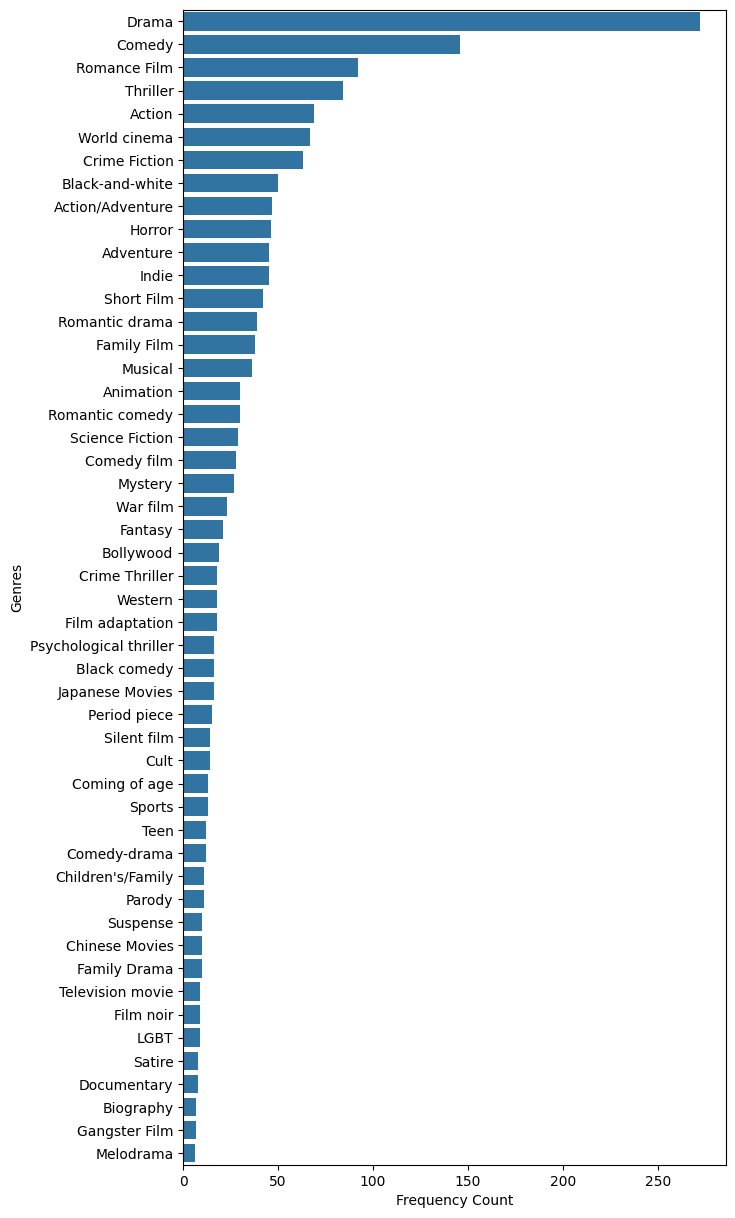

In [35]:
# Plotting the top 50 genres
genre_top_50 = df_genre_count.sort_values(by=['Count'], ascending=False).iloc[0:50, :]
plt.figure(figsize=(7,15))
sns.barplot(x='Count', y='Genre', data=genre_top_50)
plt.xlabel('Frequency Count')
plt.ylabel('Genres')

## **Data Preprocessing**
• *Clean plot summary*<br/>
• *Remove stopwords*<br/>
• *Stem plot summary*<br/>
• *Convert Genre into Target variables using MultiLabelBinarizer*<br/>
• *Split dataset into train and test set*<br/>
• *Create features from corpus using TfidfVectorizer*<br/>

In [36]:
# Importing essential libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
def plot_clean(text):
  text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text)
  text = text.lower()
  text = ' '.join(text.split())
  return text

In [38]:
df['clean_plot'] = df['plot'].apply(lambda x: plot_clean(x))
df[['plot', 'clean_plot']].head()

,plot,clean_plot
0,The story starts as one of the robots flies i...,the story starts as one of the robots flies in...
1,"The film opens in 1991, with the funeral of a ...",the film opens in with the funeral of a world ...
2,"Pedarayudu is a very kind-hearted, discipline...",pedarayudu is a very kind hearted disciplined ...
3,Computer experts around the world strive towar...,computer experts around the world strive towar...
4,A redneck officer is put in charge of a squad...,a redneck officer is put in charge of a squad ...


In [39]:
# Removing the stopwords from 'clean_plot'
stopwords_set = set(stopwords.words('english'))

def plot_stopwords(text):
  words = text.split()
  words = [word for word in words if not word in stopwords_set]
  text = ' '.join(words)
  return text

In [40]:
df['clean_noStopword_plot'] = df['clean_plot'].apply(lambda x: plot_stopwords(x))
df[['clean_plot', 'clean_noStopword_plot']].head()

,clean_plot,clean_noStopword_plot
0,the story starts as one of the robots flies in...,story starts one robots flies scientist secret...
1,the film opens in with the funeral of a world ...,film opens funeral world war ii veteran man da...
2,pedarayudu is a very kind hearted disciplined ...,pedarayudu kind hearted disciplined man sits a...
3,computer experts around the world strive towar...,computer experts around world strive towards d...
4,a redneck officer is put in charge of a squad ...,redneck officer put charge squad black troops ...


In [42]:
# Stemming the words from 'clean_noStopwords_plot'
ps = PorterStemmer()

def plot_stemming(text):
  words = text.split()
  words = [ps.stem(word) for word in words]
  text = ' '.join(words)
  return text

In [43]:
df['clean_noStopword_stem_plot'] = df['clean_noStopword_plot'].apply(lambda x: plot_stemming(x))
df[['clean_noStopword_plot', 'clean_noStopword_stem_plot']].head()

,clean_noStopword_plot,clean_noStopword_stem_plot
0,story starts one robots flies scientist secret...,stori start one robot fli scientist secret lai...
1,film opens funeral world war ii veteran man da...,film open funer world war ii veteran man daugh...
2,pedarayudu kind hearted disciplined man sits a...,pedarayudu kind heart disciplin man sit ancest...
3,computer experts around world strive towards d...,comput expert around world strive toward devel...
4,redneck officer put charge squad black troops ...,redneck offic put charg squad black troop char...


In [44]:
# Convert Genre into Target variables using MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre'])

In [45]:
X = df['clean_noStopword_stem_plot']

In [46]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [47]:
# Creating independent features using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## **Model Building**

In [48]:
# Logistic Regression Model
# Importing essential libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [49]:
lr = LogisticRegression()
ovr_clf = OneVsRestClassifier(lr)

In [50]:
# Fit model on train data
ovr_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 31 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 52 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 91 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 92 is present in all training exampl

OneVsRestClassifier(estimator=LogisticRegression())

In [51]:
# Predicting values for test set
y_pred_ovr = ovr_clf.predict(X_test)
y_pred_ovr[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [52]:
mlb.inverse_transform(y_pred_ovr)[5]

('Drama',)

In [53]:
# Model Evaluation
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_ovr, average="micro"))

0.09913793103448276


In [54]:
# Changing the threshold probability from 0.5 to 0.3
y_pred_prob = ovr_clf.predict_proba(X_test)
y_pred_new = (y_pred_prob >= 0.2).astype(int)

In [ ]:
f1_score(y_test, y_pred_new, average="micro")

0.47357308040352586

## **Predictions**

In [55]:
# Creating a function
def predict_genre_tags(text):
    text = plot_clean(text)
    text = plot_stopwords(text)
    text = plot_stemming(text)
    text_vec = tfidf.transform([text])
    text_pred = ovr_clf.predict(text_vec)
    return mlb.inverse_transform(text_pred)

In [56]:
# Prediction 1
movie_name = 'Titanic (1998)'
plot_summary = "After winning a trip on the RMS Titanic during a dockside card game, American Jack Dawson spots the society girl Rose DeWitt Bukater who is on her way to Philadelphia to marry her rich snob fiancé Caledon Hockley. Rose feels helplessly trapped by her situation and makes her way to the aft deck and thinks of suicide until she is rescued by Jack. Cal is therefore obliged to invite Jack to dine at their first-class table where he suffers through the slights of his snobbish hosts. In return, he spirits Rose off to third-class for an evening of dancing, giving her the time of her life. Deciding to forsake her intended future all together, Rose asks Jack, who has made his living making sketches on the streets of Paris, to draw her in the nude wearing the invaluable blue diamond Cal has given her. Cal finds out and has Jack locked away. Soon afterwards, the ship hits an iceberg and Rose must find Jack while both must run from Cal even as the ship sinks deeper into the freezing water."
actual_genre = ['Drama', 'Romance']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: Titanic (1998)
Predicted genres: ()
Actual genres: ['Drama', 'Romance']


In [57]:
# Prediction 2
movie_name = 'Avatar (2009)'
plot_summary = "On the lush alien world of Pandora live the Na'vi, beings who appear primitive but are highly evolved. Because the planet's environment is poisonous, human/Na'vi hybrids, called Avatars, must link to human minds to allow for free movement on Pandora. Jake Sully (Sam Worthington), a paralyzed former Marine, becomes mobile again through one such Avatar and falls in love with a Na'vi woman (Zoe Saldana). As a bond with her grows, he is drawn into a battle for the survival of her world."
actual_genre = ['Action', 'Adventure', 'Fantasy']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: Avatar (2009)
Predicted genres: ()
Actual genres: ['Action', 'Adventure', 'Fantasy']


In [58]:
# Prediction 3
movie_name = 'Conjuring (2013)'
plot_summary = "In 1971, Carolyn and Roger Perron move their family into a dilapidated Rhode Island farm house and soon strange things start happening around it with escalating nightmarish terror. In desperation, Carolyn contacts the noted paranormal investigators, Ed and Lorraine Warren, to examine the house. What the Warrens discover is a whole area steeped in a satanic haunting that is now targeting the Perron family wherever they go. To stop this evil, the Warrens will have to call upon all their skills and spiritual strength to defeat this spectral menace at its source that threatens to destroy everyone involved."
actual_genre = ['Horror', 'Thriller']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: Conjuring (2013)
Predicted genres: ()
Actual genres: ['Horror', 'Thriller']


In [59]:
# Prediction 4
movie_name = 'The Hangover (2009)'
plot_summary = "Three buddies wake up from a bachelor party in Las Vegas, with no memory of the previous night and the bachelor missing. They make their way around the city in order to find their friend before his wedding."
actual_genre = ['Comedy']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: The Hangover (2009)
Predicted genres: ()
Actual genres: ['Comedy']


In [60]:
# Prediction 5
movie_name = 'La La Land (2016)'
plot_summary = "The story of aspiring actress Mia and dedicated jazz musician Sebastian, who struggle to make ends meet while pursuing their dreams in a city known for destroying hopes and breaking hearts. With modern-day Los Angeles as the backdrop, this musical about everyday life explores what more important: a once-in-a-lifetime love or the spotlight."
actual_genre = ['Comedy', 'Drama', 'Music']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: La La Land (2016)
Predicted genres: ('Drama',)
Actual genres: ['Comedy', 'Drama', 'Music']
